# preprocessing of data set

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train.shape, test.shape

((614, 13), (367, 12))

In [5]:
#Combining both train and test dataset
fullData = pd.concat([train.iloc[:,:train.shape[1]-1],test],axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [6]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              981 non-null object
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 72.8+ KB


In [7]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']

cat_cols = [col for col in fullData.columns if fullData[col].dtypes=='object']

cat_cols.remove(ID_col[0])
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [8]:
str(['Loan_ID'])

"['Loan_ID']"

In [9]:
num_cols= list(set(list(fullData.columns))-set(cat_cols)-set(ID_col))
print(num_cols)

['LoanAmount', 'ApplicantIncome', 'Loan_Amount_Term', 'CoapplicantIncome', 'Credit_History']


In [10]:
fullData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [11]:
#Imputing Missing values with mean for continuous variable
fullData[num_cols] = fullData[num_cols].fillna(fullData[num_cols].mean(),inplace=True)
fullData.head()

C:\Users\anhnt\Anaconda2\lib\site-packages\pandas\core\generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,142.51153,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.00000,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.00000,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00000,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.00000,360.0,1.0,Urban


In [12]:
fullData[cat_cols].mode()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,Yes,0,Graduate,No,Semiurban


In [13]:
#Imputing Missing values with mode for categorical variables
cat_imput=pd.Series(fullData[cat_cols].mode().values[0])
cat_imput.index=cat_cols
fullData[cat_cols] = fullData[cat_cols].fillna(cat_imput,inplace=True)

In [30]:
# Check the available missing values in the dataset
fullData.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [15]:
fullData.loc[:,'Credit_History'].apply(lambda x: 1 if x > 0.5 else 0)

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     0
18     1
19     1
20     0
21     1
22     0
23     0
24     1
25     1
26     1
27     1
28     1
29     1
      ..
337    1
338    1
339    0
340    1
341    1
342    1
343    1
344    1
345    1
346    0
347    1
348    1
349    1
350    1
351    1
352    1
353    1
354    0
355    1
356    1
357    1
358    1
359    1
360    1
361    1
362    1
363    1
364    1
365    1
366    1
Name: Credit_History, dtype: int64

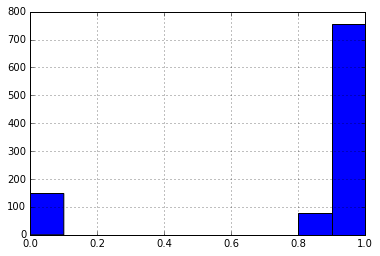

In [16]:
%matplotlib inline
fullData.loc[:,'Credit_History'].hist()

In [17]:
fullData[num_cols].describe()

,LoanAmount,ApplicantIncome,Loan_Amount_Term,CoapplicantIncome,Credit_History
count,981.00000,981.000000,981.000000,981.000000,981.000000
mean,142.51153,5179.795107,342.201873,1601.916330,0.835920
std,76.34777,5695.104533,64.432886,2718.772806,0.355304
min,9.00000,0.000000,6.000000,0.000000,0.000000
25%,101.00000,2875.000000,360.000000,0.000000,1.000000
50%,128.00000,3800.000000,360.000000,1110.000000,1.000000
75%,160.00000,5516.000000,360.000000,2365.000000,1.000000
max,700.00000,81000.000000,480.000000,41667.000000,1.000000


In [18]:
fullData.std()

ApplicantIncome      5695.104533
CoapplicantIncome    2718.772806
LoanAmount             76.347770
Loan_Amount_Term       64.432886
Credit_History          0.355304
dtype: float64

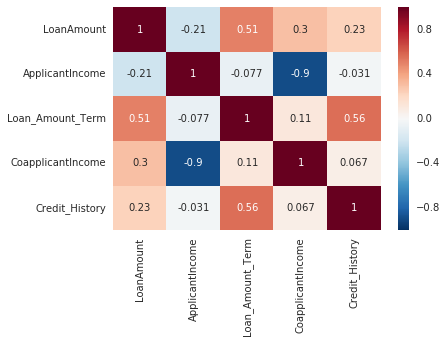

In [31]:
import seaborn as sns
%matplotlib inline
corr = fullData[num_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x08CD1310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0901FA10>]], dtype=object)

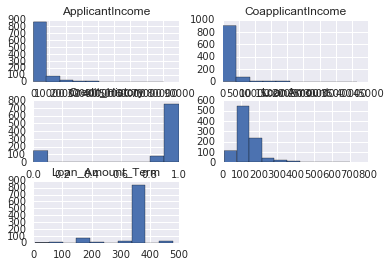

In [20]:
fullData[num_cols].hist()

In [21]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

In [22]:
import matplotlib.pyplot as plt

In [32]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
norm = Normalizer()

In [24]:
fullData[num_cols] = norm.fit_transform(fullData[num_cols])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x08D2ADD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x09D19EB0>]], dtype=object)

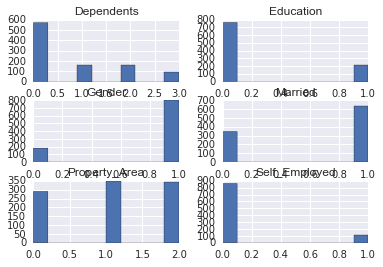

In [25]:
fullData[cat_cols].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0AC05E50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0ADA2150>]], dtype=object)

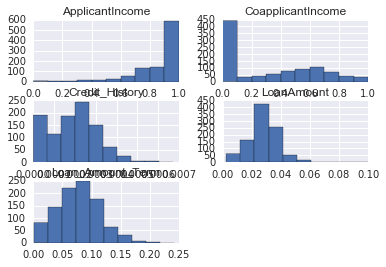

In [33]:
fullData[num_cols].hist()

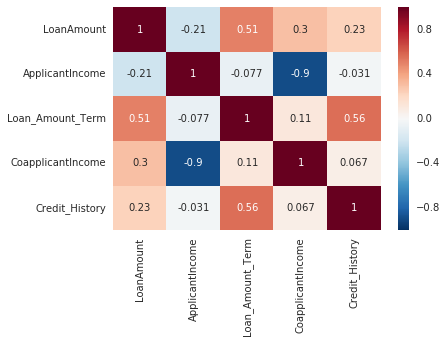

In [34]:
corr = fullData[num_cols].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

In [35]:
fullData.std()

Gender               0.388921
Married              0.478368
Dependents           1.030657
Education            0.415952
Self_Employed        0.326648
ApplicantIncome      0.176427
CoapplicantIncome    0.320456
LoanAmount           0.010780
Loan_Amount_Term     0.037342
Credit_History       0.000119
Property_Area        0.801302
dtype: float64

In [57]:
fullData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              981 non-null object
Gender               981 non-null int32
Married              981 non-null int32
Dependents           981 non-null int32
Education            981 non-null int32
Self_Employed        981 non-null int32
ApplicantIncome      981 non-null float64
CoapplicantIncome    981 non-null float64
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Credit_History       981 non-null float64
Property_Area        981 non-null int32
dtypes: float64(5), int32(6), object(1)
memory usage: 72.8+ KB


In [42]:
test['Loan_Status'] = np.nan
fullData['Loan_Status'] = pd.concat([pd.DataFrame(train.Loan_Status), pd.DataFrame(test.Loan_Status)], axis=0)
fullData.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
362,1,1,3,1,1,0.910850,0.403737,0.025674,0.081792,0.000227,2,NaN
363,1,1,0,0,0,0.981839,0.167418,0.027155,0.085008,0.000236,2,NaN
364,1,0,0,0,0,0.848242,0.520168,0.032886,0.093959,0.000218,1,NaN
365,1,1,0,0,0,0.899755,0.430623,0.028432,0.064782,0.000180,0,NaN
366,1,0,0,0,1,0.999752,0.000000,0.010650,0.019560,0.000109,0,NaN


In [36]:
fullData.shape

(981, 12)

In [43]:
fullData = fullData.drop('Loan_ID', axis=1)
#fullData = fullData.drop('CoapplicantIncome', axis=1) # Correlated to ApplicantIncome
fullData.shape

ValueError: labels ['Loan_ID'] not contained in axis

In [44]:
from sklearn.cross_validation import train_test_split
train_, validate = train_test_split(fullData.iloc[:train.shape[0],:], test_size=0.2)

x_train = train_.iloc[:,:train_.shape[1]-1].values
y_train = train_.Loan_Status.values

x_validate = validate.iloc[:,:train_.shape[1]-1].values
y_validate = validate.Loan_Status.values

x_test = fullData.iloc[train.shape[0]:,:train_.shape[1]-1].values

(x_train.shape, y_train.shape,x_validate.shape, y_validate.shape, x_test.shape)

((491, 11), (491,), (123, 11), (123,), (367, 11))

In [50]:
from operator import itemgetter
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import KFold
 
names = [
        "Nearest Neighbors", 
         "Decision Tree",
         "Random Forest",
         "AdaBoost", 
        "SVC",
        "Naive Bayes"
        ]
 
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    SVC(),
    GaussianNB()
    ]

In [39]:
import time
import pyprind

def time_diff_str(t1, t2):
    """
    Calculates time durations.
    """
    diff = t2 - t1
    mins = int(diff / 60)
    secs = round(diff % 60, 2)
    return str(mins) + " mins and " + str(secs) + " seconds"

In [45]:
results = {}
results_time = {}


for name,clf in zip(names, classifiers):
    t0 = time.time()
    clf.fit(x_train, y_train)
    results[name] = clf.score(x_validate, y_validate)
    results_time[name] = time_diff_str(t0, time.time())
print "---------------------------"
print "Evaluation results"
print "---------------------------"
sorted(results.items(), key=itemgetter(1))

for name in results:
    print name + " accuracy: %0.3f" % results[name]
    print "Time: %s" % results_time[name]
    print "---------------------------"

---------------------------
Evaluation results
---------------------------
Decision Tree accuracy: 0.805
Time: 0 mins and 0.02 seconds
---------------------------
Naive Bayes accuracy: 0.748
Time: 0 mins and 0.0 seconds
---------------------------
SVC accuracy: 0.667
Time: 0 mins and 0.01 seconds
---------------------------
AdaBoost accuracy: 0.813
Time: 0 mins and 0.23 seconds
---------------------------
Random Forest accuracy: 0.748
Time: 0 mins and 0.02 seconds
---------------------------
Nearest Neighbors accuracy: 0.602
Time: 0 mins and 0.0 seconds
---------------------------


In [48]:
predictors = fullData.columns[:-1]
outcome = 'Loan_Status'

In [51]:
from sklearn.metrics import accuracy_score
#Generic function for making a classification model and accessing performance:
def classification_model(model, data):
    #Fit the model:
    model.fit(data[predictors],data[outcome])

    #Make predictions on training set:
    predictions = model.predict(data[predictors])

    #Print accuracy
    accuracy = accuracy_score(predictions,data[outcome])
    print "Accuracy : %s" % "{0:.3%}".format(accuracy)

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

    print "Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome]) 

In [52]:
classification_model(AdaBoostClassifier(), fullData.iloc[:train.shape[0],:])

Accuracy : 85.342%
Cross-Validation Score : 79.965%


In [53]:
classification_model(RandomForestClassifier(), fullData.iloc[:train.shape[0],:])

Accuracy : 99.023%
Cross-Validation Score : 79.315%


In [57]:
fullData.shape, train.shape[0]

((981, 12), 614)

In [58]:
x = fullData.iloc[:train.shape[0],:-1].values
y = fullData.iloc[:train.shape[0],-1].values
x.shape, y.shape

((614, 11), (614,))

In [59]:
clf = AdaBoostClassifier()
from sklearn.grid_search import GridSearchCV
parameter_grid = {'n_estimators': [50, 70, 100],
                  'algorithm': ['SAMME', 'SAMME.R']}

cv = 
grid_search = GridSearchCV(clf,
                           param_grid=parameter_grid)


grid_search.fit(x, y)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.801302931596
Best parameters: {'n_estimators': 50, 'algorithm': 'SAMME'}


In [60]:
clf = AdaBoostClassifier('n_estimators'= 50, 'algorithm'= 'SAMME')
clf =clf.fit(fullData.iloc[:train.shape[0],:-1], fullData.iloc[:train.shape[0],-1])
y_test = clf.predict(fullData.iloc[train.shape[0]:,:-1])

SyntaxError: keyword can't be an expression (<ipython-input-60-ac9b7dedb965>, line 1)

In [95]:
result = pd.DataFrame()
result['Loan_ID'] = test['Loan_ID']
result['Loan_Status'] = y_test
result.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [96]:
result.to_csv('submission_AdaBoost.csv', index=False)